In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from datetime import datetime
import matplotlib.pyplot as plt
from math import ceil
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA

     f

In [58]:
df = pd.read_sas('a2z_insurance.sas7bdat')
df.set_index('CustID', inplace=True)

In [59]:
df.head(5)

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [60]:
df.shape

(10296, 13)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10296 entries, 1.0 to 10296.0
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FirstPolYear   10266 non-null  float64
 1   BirthYear      10279 non-null  float64
 2   EducDeg        10279 non-null  object 
 3   MonthSal       10260 non-null  float64
 4   GeoLivArea     10295 non-null  float64
 5   Children       10275 non-null  float64
 6   CustMonVal     10296 non-null  float64
 7   ClaimsRate     10296 non-null  float64
 8   PremMotor      10262 non-null  float64
 9   PremHousehold  10296 non-null  float64
 10  PremHealth     10253 non-null  float64
 11  PremLife       10192 non-null  float64
 12  PremWork       10210 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.1+ MB


In [62]:
non_metric_features = ["EducDeg", "Children", 'GeoLivArea']
metric_features=df.columns.drop(non_metric_features).to_list()

In [63]:
df.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [64]:
#Check duplicates
df.duplicated().sum()

3

In [65]:
df_filled=df.copy()
modes = df[non_metric_features].mode().loc[0]
df_filled.fillna(modes, inplace=True)
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_filled[metric_features] = imputer.fit_transform(df_filled[metric_features])

In [66]:
df_filled = df_filled.astype({'FirstPolYear': int, 'BirthYear': int, 'MonthSal': int , 'GeoLivArea': int, 'Children': int})

In [67]:
df_filled.sample(5)

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
8978.0,1986,1978,b'2 - High School',1299,4,1,-113.13,1.10,244.38,315.05,194.48,47.01,41.12
8034.0,1976,1998,b'2 - High School',1467,3,1,478.87,0.57,45.12,702.35,176.81,155.03,88.57
1729.0,1992,1945,b'1 - Basic',3609,2,0,664.68,0.30,271.05,501.20,95.13,100.13,17.56
3148.0,1990,1975,b'3 - BSc/MSc',1989,3,1,-1.66,0.96,291.50,48.90,251.27,25.56,1.89
2540.0,1996,1964,b'4 - PhD',3033,4,1,500.44,0.09,555.44,5.00,28.56,-4.00,-6.00


In [68]:
df_filled.isna().sum()

FirstPolYear     0
BirthYear        0
EducDeg          0
MonthSal         0
GeoLivArea       0
Children         0
CustMonVal       0
ClaimsRate       0
PremMotor        0
PremHousehold    0
PremHealth       0
PremLife         0
PremWork         0
dtype: int64

In [69]:
nans_index = df.isna().any(axis=1)
df[nans_index]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
22.0,1977.0,1958.0,b'2 - High School',NaN,3.0,1.0,111.37,0.80,407.52,111.70,100.13,24.67,30.34
69.0,1983.0,1977.0,b'2 - High School',1399.0,4.0,1.0,476.65,0.33,330.73,186.70,211.15,NaN,15.78
139.0,1979.0,1976.0,b'2 - High School',2538.0,2.0,1.0,149.59,0.69,194.26,305.60,NaN,37.34,17.67
144.0,1996.0,1990.0,b'3 - BSc/MSc',NaN,4.0,1.0,-42.45,1.02,146.36,353.95,220.04,121.80,42.01
185.0,1993.0,1984.0,b'2 - High School',2419.0,4.0,1.0,-62.23,1.07,NaN,253.95,230.60,5.89,43.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10011.0,NaN,1947.0,b'2 - High School',3959.0,2.0,NaN,-128.24,1.14,177.81,153.35,311.28,67.79,35.45
10058.0,1983.0,1980.0,b'2 - High School',1569.0,4.0,1.0,222.60,0.55,235.60,211.15,NaN,32.34,68.79
10143.0,1986.0,1985.0,b'3 - BSc/MSc',1652.0,3.0,1.0,55.67,0.88,257.05,94.45,308.39,NaN,13.78


In [70]:
df_filled[nans_index]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
22.0,1977,1958,b'2 - High School',2541,3,1,111.37,0.80,407.520,111.70,100.130,24.670,30.340
69.0,1983,1977,b'2 - High School',1399,4,1,476.65,0.33,330.730,186.70,211.150,33.784,15.780
139.0,1979,1976,b'2 - High School',2538,2,1,149.59,0.69,194.260,305.60,226.598,37.340,17.670
144.0,1996,1990,b'3 - BSc/MSc',1721,4,1,-42.45,1.02,146.360,353.95,220.040,121.800,42.010
185.0,1993,1984,b'2 - High School',2419,4,1,-62.23,1.07,264.428,253.95,230.600,5.890,43.120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10011.0,1990,1947,b'2 - High School',3959,2,1,-128.24,1.14,177.810,153.35,311.280,67.790,35.450
10058.0,1983,1980,b'2 - High School',1569,4,1,222.60,0.55,235.600,211.15,247.602,32.340,68.790
10143.0,1986,1985,b'3 - BSc/MSc',1652,3,1,55.67,0.88,257.050,94.45,308.390,23.338,13.780


In [71]:
df=df_filled.copy()

In [72]:
##PERGUNTAR SE É EM 2016 OU AGORAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA!!!
df['Age'] = 2016-df['BirthYear']
df.drop(columns='BirthYear', inplace=True)
#remove from metric_features list
metric_features.remove('BirthYear')
metric_features.append('Age')

In [73]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
FirstPolYear,10296.0,NaN,NaN,NaN,1991.046814,510.522554,1974.0,1980.0,1986.0,1992.0,53784.0
EducDeg,10296,4,b'3 - BSc/MSc',4816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthSal,10296.0,NaN,NaN,NaN,2506.457459,1156.114995,333.0,1706.75,2500.5,3290.0,55215.0
GeoLivArea,10296.0,NaN,NaN,NaN,2.709984,1.266293,1.0,1.0,3.0,4.0,4.0
Children,10296.0,NaN,NaN,NaN,0.707362,0.454996,0.0,0.0,1.0,1.0,1.0
CustMonVal,10296.0,NaN,NaN,NaN,177.892605,1945.811505,-165680.42,-9.44,186.87,399.7775,11875.89
ClaimsRate,10296.0,NaN,NaN,NaN,0.742772,2.916964,0.0,0.39,0.72,0.98,256.2
PremMotor,10296.0,NaN,NaN,NaN,300.671206,211.65539,-4.11,191.26,299.28,408.3,11604.42
PremHousehold,10296.0,NaN,NaN,NaN,210.431192,352.595984,-75.0,49.45,132.8,290.05,25048.8
PremHealth,10296.0,NaN,NaN,NaN,171.62386,295.806871,-2.11,111.91,162.92,219.235,28272.0


In [74]:
# sorted(df['PremLife'].unique())[-40:]

### Analysis before outliers

In [75]:
def box_plot_all_vars(data):
    # All Numeric Variables' Box Plots in one figure
    sns.set()

    # Prepare figure. Create individual axes where each box plot will be placed
    fig, axes = plt.subplots(4, ceil(len(metric_features) / 4), figsize=(25, 20))

    # Plot data
    # Iterate across axes objects and associate each box plot (hint: use the ax argument):
    for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
        bxplot = sns.boxplot(x=data[feat], ax=ax, color='chartreuse', fliersize=8)
        bxplot.set_xlabel(fontsize=16, xlabel=feat)

    
        
    # Layout
    # Add a centered title to the figure:
    title = "Numeric Variables' Box Plots"

    plt.suptitle(title, size=30)

    plt.show()

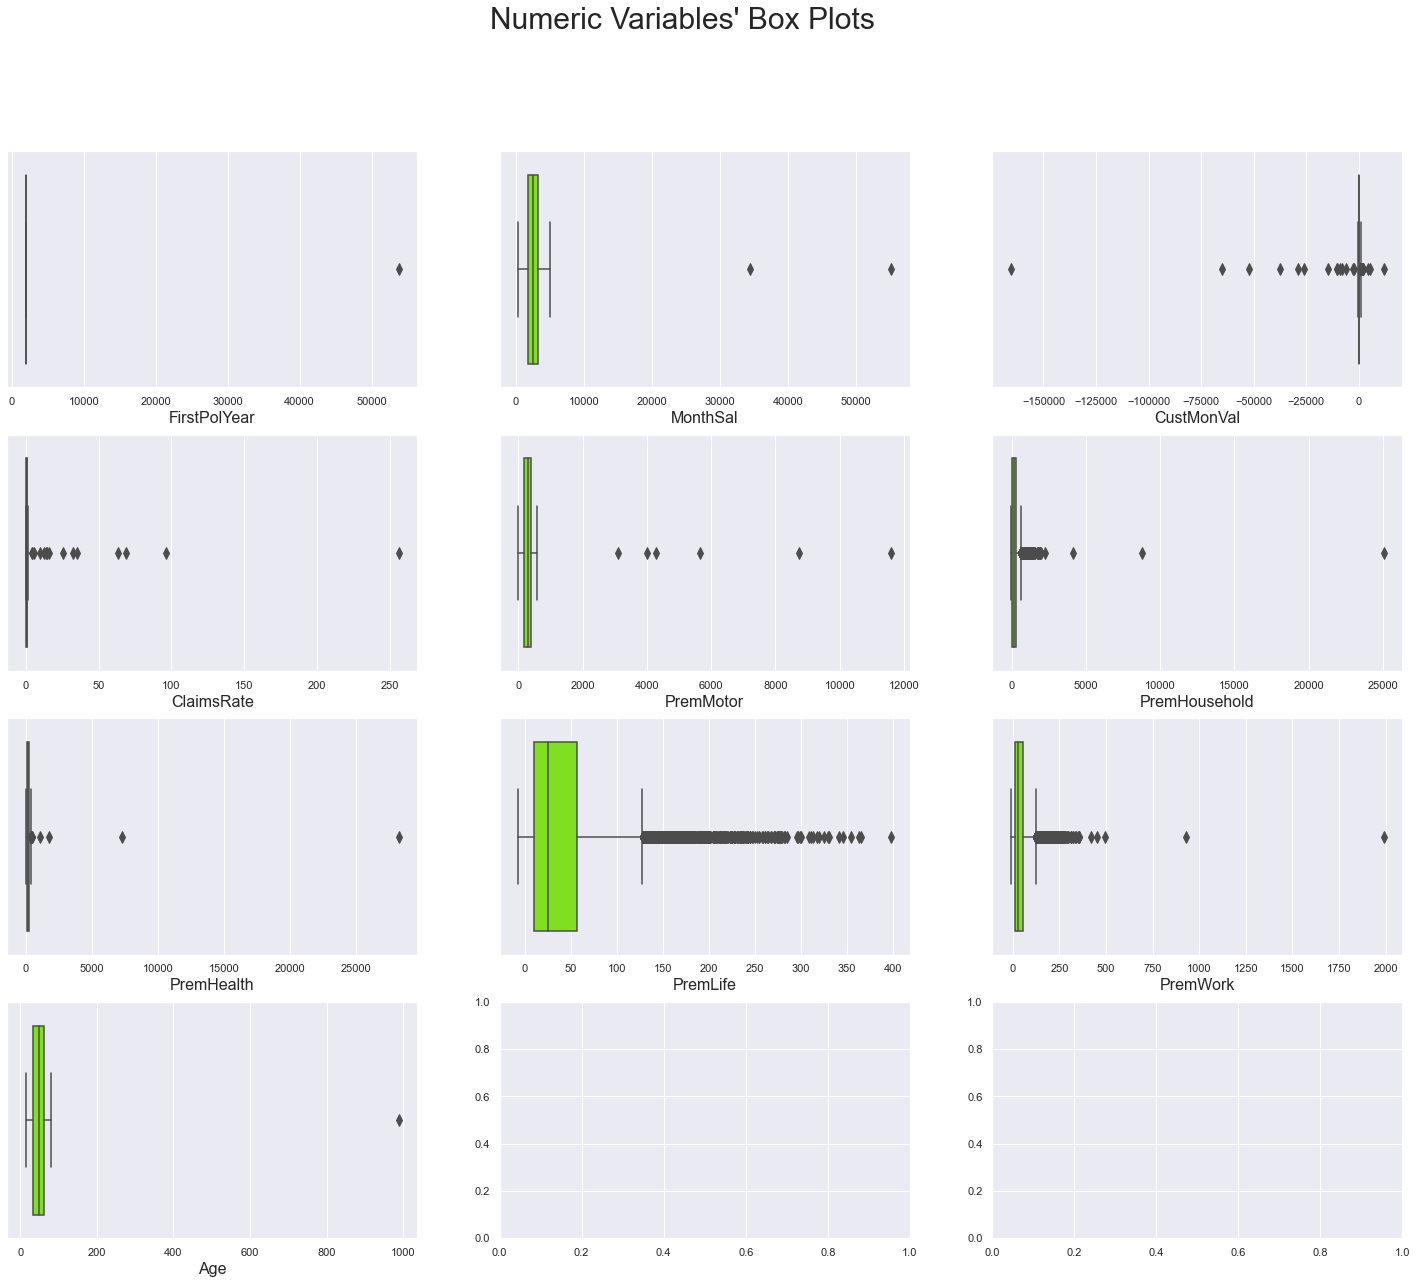

In [76]:
box_plot_all_vars(df)

In [77]:
filters1 = (
    (df['FirstPolYear']<=2016)
    &
    (df['MonthSal']<=5500)
    &
    (df['CustMonVal']>=-3000)
    &
    (df['CustMonVal']<=3000)
    &
    (df['ClaimsRate']<=6)
    &
    (df['PremMotor']<=700)
    &
    (df['PremHousehold']<=1500)
    &
    (df['PremHealth']<=760)
    &
    (df['PremLife']<=150)
    &
    (df['Age']<=85)
)

df_1 = df[filters1]
print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / df.shape[0], 4))

Percentage of data kept after removing outliers: 0.9553


In [78]:
# df_3['FirstPolYear'].unique()

In [79]:
q25 = df.quantile(.25)
q75 = df.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(df[metric].between(llim, ulim, inclusive='both'))

filters2 = pd.Series(np.all(filters2, 0))
df_2=df.copy()
df_2['filters2'] = filters2.to_list()
df_2=df_2[df_2['filters2']!=False]
print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0] / df.shape[0], 4))

Percentage of data kept after removing outliers: 0.8543


In [80]:
df_3 = df.copy()
df_3['filters1'] = filters1.to_list()
df_3['filters2'] = filters2
df_3 = df_3[(df_3['filters1']==True) | (df_3['filters2']==True)]
print('Percentage of data kept after removing outliers:', np.round(df_3.shape[0] / df.shape[0], 4))

Percentage of data kept after removing outliers: 0.9944


In [81]:
## print para comparar os dois metodos de outliers, e colocar que se escolheu so usar o manual
df_3.drop(columns=['filters1','filters2'], inplace=True)
print('Data shape before outliers removal:')
print(df.shape)
print('Data shape after outliers removal:')
print(df_1.shape)


Data shape before outliers removal:
(10296, 13)
Data shape after outliers removal:
(9836, 13)


In [82]:
df=df_1.copy()

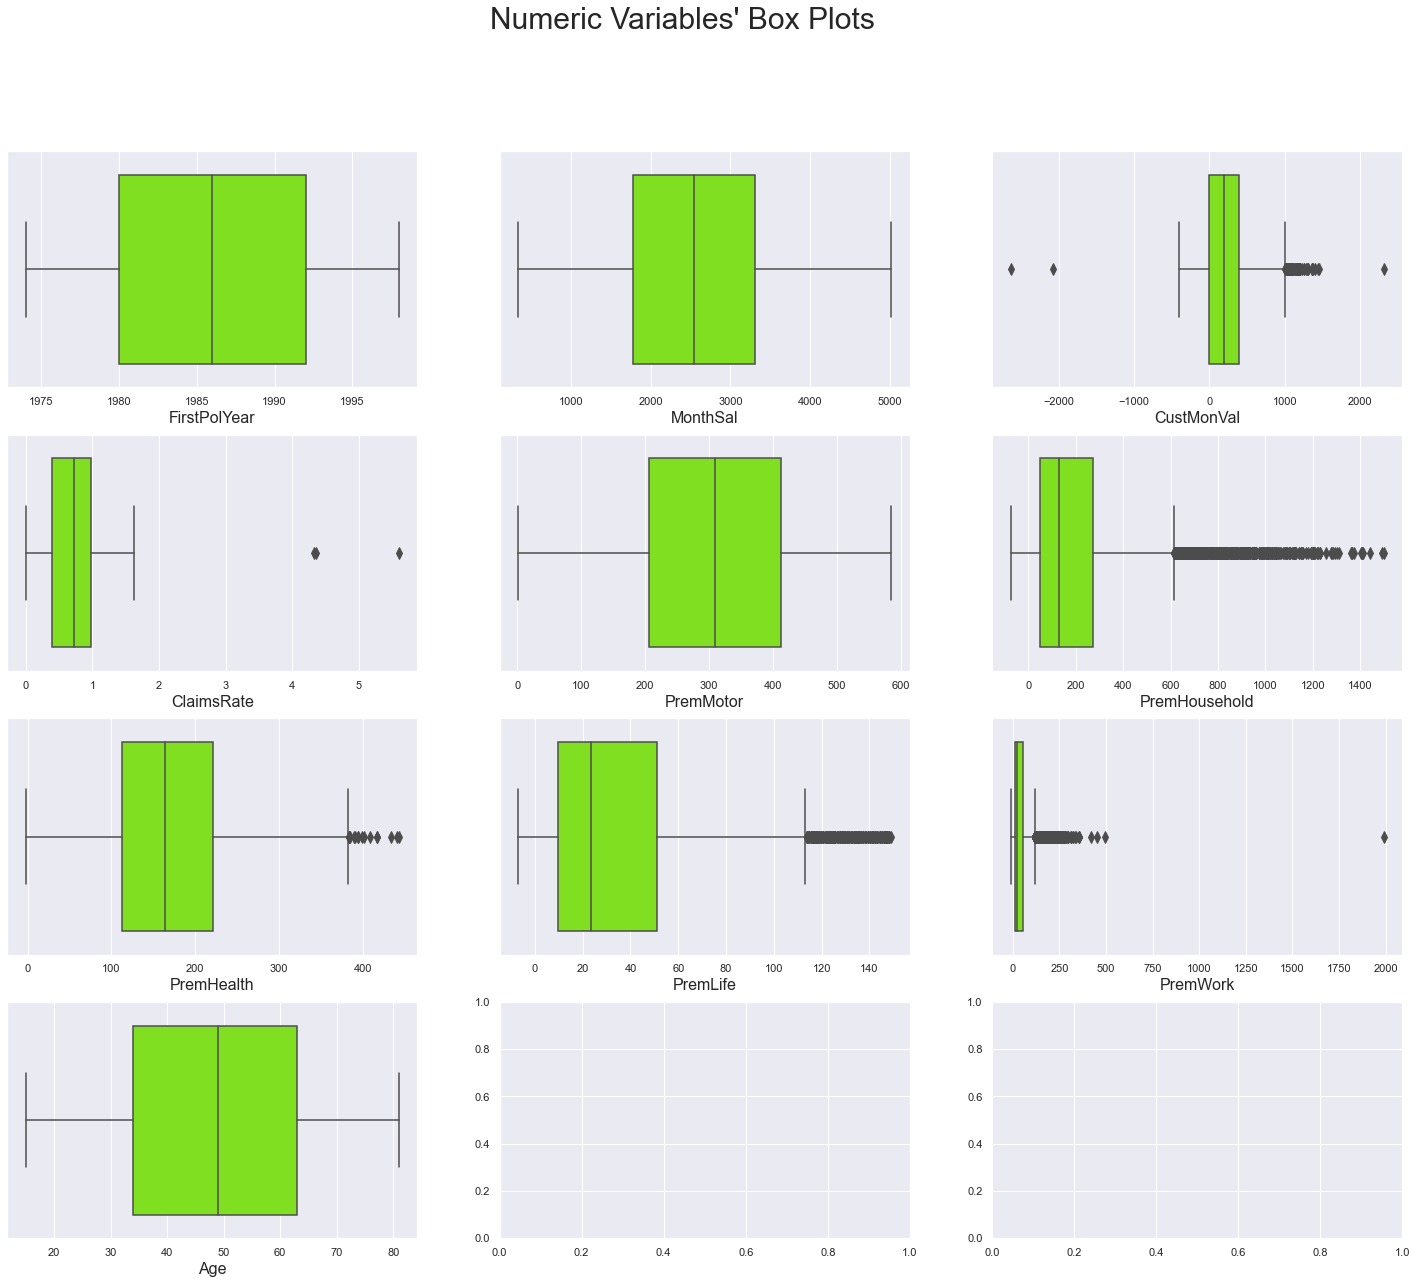

In [83]:
box_plot_all_vars(df)

In [84]:
df['FirstPolYear'].unique()

array([1985, 1991, 1990, 1986, 1979, 1988, 1981, 1976, 1983, 1977, 1998,
       1974, 1978, 1995, 1980, 1984, 1989, 1987, 1982, 1994, 1993, 1992,
       1997, 1996, 1975])

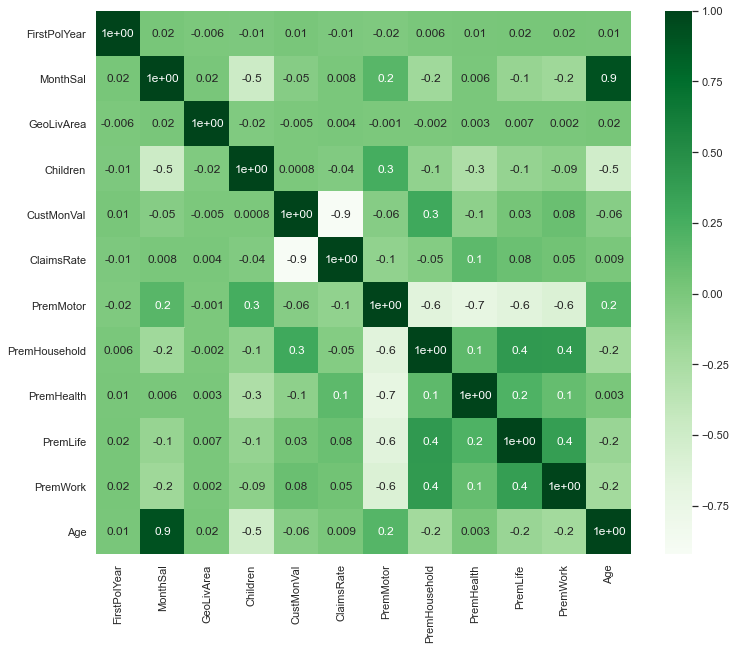

In [85]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Greens, fmt='.1')
    plt.show()
cor_pearson = df.corr()
cor_heatmap(cor_pearson)

#droppar monthsal?

<AxesSubplot:xlabel='MonthSal', ylabel='Age'>

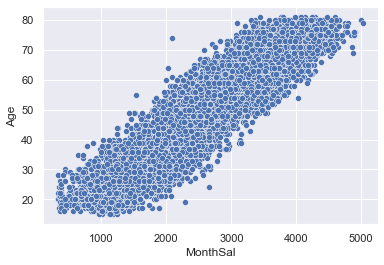

In [86]:
sns.scatterplot(x='MonthSal', y='Age', data=df)

In [87]:
df[metric_features].sample(5)

,FirstPolYear,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Age
CustID,,,,,,,,,,
1060.0,1977,3297,484.43,0.12,511.43,0.00,58.79,6.89,4.89,49
432.0,1976,2430,-13.32,0.98,481.20,13.90,88.35,-1.11,3.78,52
5857.0,1980,1454,95.57,0.83,419.19,123.90,137.47,11.67,-1.11,32
10221.0,1983,2185,598.56,0.00,479.98,34.45,93.35,10.89,4.89,48
10266.0,1988,2519,698.69,0.00,421.19,142.25,104.13,23.56,32.56,48


In [88]:
#NORMALIZAR
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[metric_features])
df[metric_features] = scaled_features
df.describe().T



,count,mean,std,min,25%,50%,75%,max
FirstPolYear,9836.0,0.500936,0.274501,0.0,0.250000,0.500000,0.750000,1.0
MonthSal,9836.0,0.470872,0.205015,0.0,0.307594,0.471630,0.633799,1.0
GeoLivArea,9836.0,2.706791,1.266051,1.0,1.000000,3.000000,4.000000,4.0
Children,9836.0,0.710553,0.453529,0.0,0.000000,1.000000,1.000000,1.0
CustMonVal,9836.0,0.576706,0.051150,0.0,0.531311,0.570952,0.613459,1.0
ClaimsRate,9836.0,0.121287,0.058204,0.0,0.069643,0.128571,0.175000,1.0
PremMotor,9836.0,0.522579,0.227477,0.0,0.350285,0.527809,0.703620,1.0
PremHousehold,9836.0,0.171579,0.140278,0.0,0.078415,0.128922,0.222180,1.0
PremHealth,9836.0,0.385171,0.167531,0.0,0.258489,0.373126,0.501000,1.0
PremLife,9836.0,0.268330,0.218473,0.0,0.107468,0.196426,0.372230,1.0


In [89]:
df[non_metric_features]

,EducDeg,Children,GeoLivArea
CustID,,,
1.0,b'2 - High School',1,1
3.0,b'1 - Basic',0,3
4.0,b'3 - BSc/MSc',1,4
5.0,b'3 - BSc/MSc',1,4
6.0,b'2 - High School',1,4
...,...,...,...
10292.0,b'4 - PhD',0,2
10293.0,b'1 - Basic',0,3
10294.0,b'3 - BSc/MSc',1,1


In [90]:
##ONE HOT ENCODING
df_ohc = df[non_metric_features].copy()

ohc = OneHotEncoder(sparse=False)
ohc_feat = ohc.fit_transform(df_ohc)
ohc_feat_names = ohc.get_feature_names_out()
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)
ohc_df.drop(['Children_0'],axis=1, inplace=True)
ohc_df



,EducDeg_b'1 - Basic',EducDeg_b'2 - High School',EducDeg_b'3 - BSc/MSc',EducDeg_b'4 - PhD',Children_1,GeoLivArea_1,GeoLivArea_2,GeoLivArea_3,GeoLivArea_4
CustID,,,,,,,,,
1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
6.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
10292.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
10293.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10294.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [92]:
df_scaled=df.merge(ohc_df, on = 'CustID')
df_scaled.drop(['Children', 'EducDeg', 'GeoLivArea'],axis=1, inplace=True)
df_scaled

,FirstPolYear,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Age,EducDeg_b'1 - Basic',EducDeg_b'2 - High School',EducDeg_b'3 - BSc/MSc',EducDeg_b'4 - PhD',Children_1,GeoLivArea_1,GeoLivArea_2,GeoLivArea_3,GeoLivArea_4
CustID,,,,,,,,,,,,,,,,,,,
1.0,0.458333,0.393345,0.610007,0.069643,0.641146,0.098185,0.333663,0.345908,0.014440,0.287879,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3.0,0.708333,0.414676,0.634961,0.050000,0.350285,0.190394,0.284716,0.597861,0.055491,0.469697,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4.0,0.666667,0.163396,0.529727,0.176786,0.309715,0.075236,0.704047,0.271167,0.020163,0.303030,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5.0,0.500000,0.305034,0.540261,0.160714,0.577334,0.078065,0.415084,0.165108,0.026716,0.424242,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
6.0,0.500000,0.476323,0.528246,0.178571,0.752382,0.059693,0.262737,0.089663,0.009832,0.681818,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10292.0,0.416667,0.609002,0.533132,0.171429,0.671809,0.079114,0.395352,0.107468,0.013385,0.787879,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
10293.0,0.125000,0.447526,0.816706,0.000000,0.225902,0.706112,0.326674,0.127386,0.058545,0.742424,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10294.0,0.833333,0.551408,0.638881,0.037500,0.688760,0.132100,0.324426,0.125977,0.008442,0.378788,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0


In [94]:
##PCA
df_pca = df_scaled.copy()


pca = PCA()
pca_feat = pca.fit_transform(df_pca[metric_features])
pca_feat  



array([[ 0.11732721, -0.20968029, -0.00991274, ..., -0.03029885,
         0.00174008,  0.00498865],
       [ 0.24134377,  0.197162  , -0.16699619, ...,  0.09124511,
        -0.00957852, -0.00681346],
       [ 0.39819281,  0.01122442, -0.16553661, ...,  0.00559311,
        -0.00205774, -0.01057364],
       ...,
       [-0.1087942 , -0.1211771 , -0.37362829, ..., -0.02408066,
        -0.003426  ,  0.00164165],
       [ 0.32150173,  0.02856263,  0.22227566, ...,  0.05476146,
         0.00757411,  0.0057992 ],
       [-0.08138089, -0.23576052, -0.23041292, ..., -0.0160603 ,
        -0.00233019,  0.00400914]])

In [95]:
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

,Eigenvalue,Difference,Proportion,Cumulative
1,0.120284,0.000000,0.357013,0.357013
2,0.084221,-0.036063,0.249975,0.606988
3,0.074802,-0.009419,0.222018,0.829006
4,0.029253,-0.045549,0.086825,0.915831
5,0.016401,-0.012852,0.048679,0.964510
6,0.005360,-0.011041,0.015910,0.980420
7,0.003940,-0.001420,0.011695,0.992114
8,0.002385,-0.001555,0.007079,0.999194
9,0.000166,-0.002219,0.000493,0.999687
10,0.000105,-0.000061,0.000313,1.000000


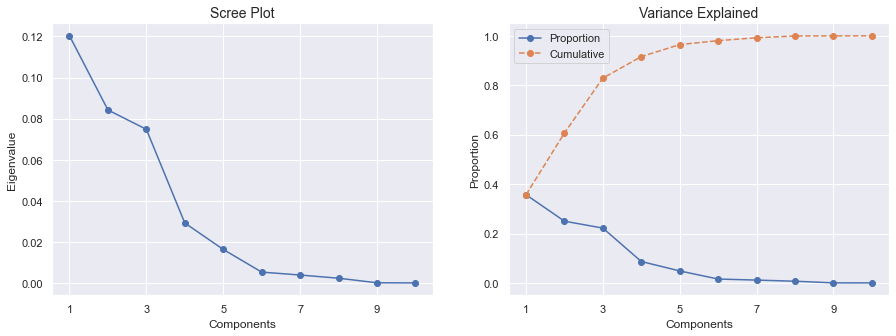

In [96]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))


ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")


ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [97]:
#3 ou 4 componentes
pca = PCA(n_components=3)
pca_feat = pca.fit_transform(df_pca[metric_features])
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_df

,PC0,PC1,PC2
CustID,,,
1.0,0.117327,-0.209680,-0.009913
3.0,0.241344,0.197162,-0.166996
4.0,0.398193,0.011224,-0.165537
5.0,0.048469,-0.182264,-0.043507
6.0,-0.323706,-0.157717,-0.037740
...,...,...,...
10292.0,-0.376892,0.019490,0.092919
10293.0,0.067153,0.176377,0.432819
10294.0,-0.108794,-0.121177,-0.373628


In [98]:
df_pca = pd.concat([df_pca, pca_df], axis=1)
df_pca.head()

,FirstPolYear,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,Age,...,EducDeg_b'3 - BSc/MSc',EducDeg_b'4 - PhD',Children_1,GeoLivArea_1,GeoLivArea_2,GeoLivArea_3,GeoLivArea_4,PC0,PC1,PC2
CustID,,,,,,,,,,,,,,,,,,,,,
1.0,0.458333,0.393345,0.610007,0.069643,0.641146,0.098185,0.333663,0.345908,0.014440,0.287879,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.117327,-0.209680,-0.009913
3.0,0.708333,0.414676,0.634961,0.050000,0.350285,0.190394,0.284716,0.597861,0.055491,0.469697,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.241344,0.197162,-0.166996
4.0,0.666667,0.163396,0.529727,0.176786,0.309715,0.075236,0.704047,0.271167,0.020163,0.303030,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.398193,0.011224,-0.165537
5.0,0.500000,0.305034,0.540261,0.160714,0.577334,0.078065,0.415084,0.165108,0.026716,0.424242,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.048469,-0.182264,-0.043507
6.0,0.500000,0.476323,0.528246,0.178571,0.752382,0.059693,0.262737,0.089663,0.009832,0.681818,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.323706,-0.157717,-0.037740


In [100]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color
    


# Interpreting each Principal Component
loadings = df_pca[metric_features + pca_feat_names].corr().loc[metric_features, pca_feat_names]
loadings.style.applymap(_color_red_or_green)



,PC0,PC1,PC2
FirstPolYear,-0.000509,0.256432,-0.966550
MonthSal,-0.781291,0.559491,0.127091
CustMonVal,0.084097,-0.006961,-0.014057
ClaimsRate,0.055319,0.100486,0.038574
PremMotor,-0.702631,-0.649188,-0.153397
PremHousehold,0.543378,0.340995,0.083975
PremHealth,0.357597,0.543537,0.137021
PremLife,0.596936,0.527221,0.117531
PremWork,0.459989,0.263187,0.048414
Age,-0.804424,0.556907,0.133962


##### GeoLivArea categórica!!!!
##### -print dos uniques para ver que está coerente
##### -ver features, se se pode fazer mais alguma coisa
##### -imputar NAs de maneiras diferentes para se comparar (criar dfs diferentes para depois se testar nos clusterings)
##### -fazer gráficos de distribuição dos dados
##### -correlações?? para depois colocar scatters??
##### -normalizar - minmax
##### -onehot encoding
##### -PCA
##### -clustering
